In [33]:
#Importamos todas las librerias necesarias.
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo Tensor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2

In [34]:
# Cargamos el Dataset
file_path = "dataset/dataset.csv"
df = pd.read_csv(file_path)

In [35]:
#Listamos columnas para X y con drop separamos como un filter
X_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour', 'delay', 'terrestrial_range', 
    'slant_range', 'final_latitude', 'final_longitude', 'final_elevation'
]
X = df[X_columns]
Y = df.drop(columns=X_columns)
#Parametros del dataset que no corresponden al X de entrenamiento.
X = X.drop(columns=['final_latitude','final_longitude','final_elevation'])

# Como solo vamos a observar las longitudes procedo a quitar el resto de columnas (latitudes y alturas.)
lat_columns = [f'lat_{i}' for i in range(1,101)]
long_columns = [f'long_{i}' for i in range(1,101)]
heights_columns = [f'elev_{i}' for i in range(1,101)]

Y = Y.drop(columns= lat_columns)
Y = Y.drop(columns = heights_columns)
# Otras columnas que no tendré en cuenta para la predicción son 
# "delay", "terrestrial_range", "slant_range", por lo que las quito
unwanted_columns = ["delay","terrestrial_range","slant_range"]
X = X.drop(columns=unwanted_columns)


In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [37]:
# Normalizamos la Frecuencia de los X 
k_norm = 1E6
x_train["fc"] = x_train["fc"]/k_norm
x_test["fc"] = x_test["fc"]/k_norm
#decidimos tomar todas las decimas.
x_test.head()


,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc,elevation,azimuth,year,mmdd,UTI,hour
5104,-42.28,-63.4,0,30.0,30,91,2010.0,1215,0,12
2186,-42.28,-63.4,0,10.0,5,98,2010.0,1231,0,8
4371,-42.28,-63.4,0,23.0,32,88,2010.0,1215,0,12
831,-42.28,-63.4,0,10.0,5,98,2010.0,519,0,12
1421,-42.28,-63.4,0,10.0,5,98,2010.0,825,0,20


In [38]:
#Aquí vamos a Normalizar las Longitudes si consideramos a futuro que es Necesario.
y_test.head()

,long_1,long_2,long_3,long_4,long_5,long_6,long_7,long_8,long_9,long_10,...,long_91,long_92,long_93,long_94,long_95,long_96,long_97,long_98,long_99,long_100
5104,-63.400008,-63.335528,-63.271047,-63.206567,-63.142087,-63.077606,-63.013376,-62.949213,-62.885050,-62.820887,...,-57.830272,-57.771078,-57.711885,-57.652691,-57.593559,-57.534657,-57.475756,-57.416854,-57.357953,-57.299051
2186,-63.400008,-63.373848,-63.352046,-63.352042,-63.343320,-63.317159,-63.225573,-63.068564,-62.876628,-62.667229,...,-46.357416,-46.357414,-46.348556,-46.321985,-46.305451,-46.298954,-46.296342,-46.295673,-46.295004,-46.294336
4371,-63.400008,-63.333597,-63.267185,-63.200774,-63.134362,-63.067969,-63.001932,-62.935894,-62.869857,-62.803819,...,-57.700296,-57.639937,-57.579579,-57.519221,-57.458863,-57.455419,-57.454971,-57.454522,-57.454074,-57.453625
831,-63.400008,-63.374332,-63.352046,-63.352043,-63.345258,-63.319581,-63.243019,-63.088917,-62.907650,-62.702129,...,-46.112449,-46.086380,-46.072606,-46.072605,-46.064092,-46.049994,-46.044829,-46.042871,-46.040913,-46.038955
1421,-63.400008,-63.356891,-63.352041,-63.318612,-63.132530,-62.826217,-62.481065,-62.135857,-61.790617,-61.445370,...,-34.249459,-33.914067,-33.578871,-33.328535,-33.236802,-33.217991,-33.181881,-33.162625,-33.162505,-33.162385


In [ ]:
# Modelo Red Neuronal capas
l2_reg = 0.005
inputs = Input(shape =(10,))
encoded = Dense(8, activation = 'relu',kernel_regularizer=l2(l2_reg))(inputs)
encoded = Dense(16, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(32, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
decoded = Dense(100, activation = 'linear',kernel_regularizer=l2(l2_reg))(encoded)

autoencoder = Model(inputs,decoded)
autoencoder.compile(optimizer = 'adamW', loss='mse')
autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,388 (36.67 KB)

 Trainable params: 9,388 (36.67 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Entrenamiento
history = autoencoder.fit(x_train,y_train, epochs=120, batch_size = 80,
                          validation_data = (x_test,y_test))

Epoch 1/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4175.7212 - val_loss: 190.1470
Epoch 2/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112.1918 - val_loss: 36.3236
Epoch 3/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.3779 - val_loss: 32.0437
Epoch 4/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.5295 - val_loss: 32.1165
Epoch 5/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.5330 - val_loss: 31.0142
Epoch 6/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34.3196 - val_loss: 30.2225
Epoch 7/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33.0625 - val_loss: 29.8146
Epoch 8/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.8540 - val_loss: 29.3777
Epoch 9/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.7420 - val_loss: 29.4689
Epoch 10/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.0697 - val_loss: 29.1571
Epoch 11/120
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.7556 - val_loss: 28.0725
Epoch 12/120
52/52 ━━━━━━━━━━━━━━━━━━

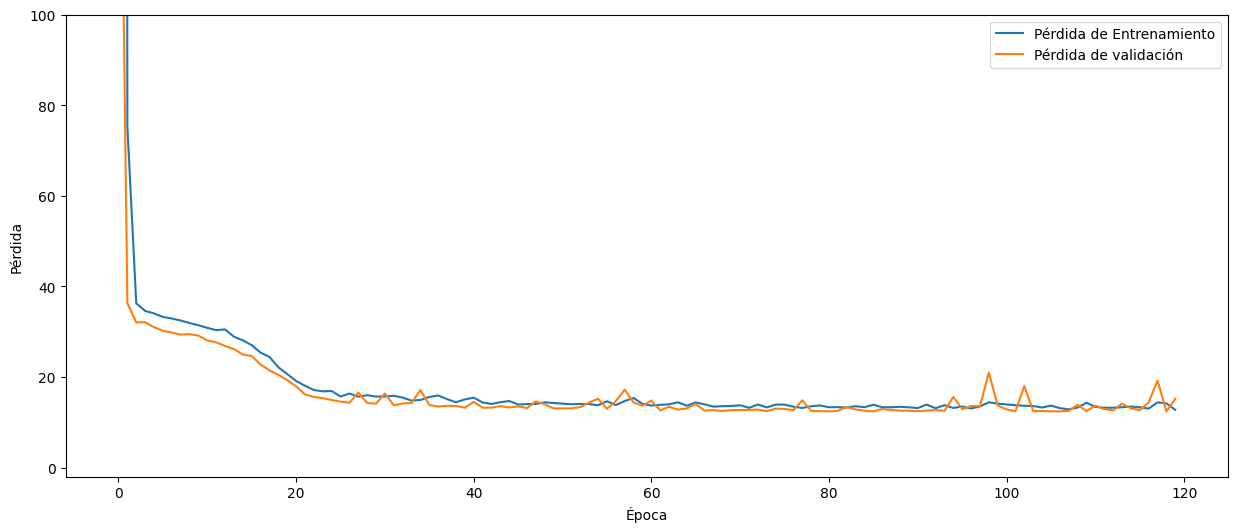

In [41]:
# Función de Pérdida durante el entrenamiento
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label = 'Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label = 'Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.ylim(-2,100)
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


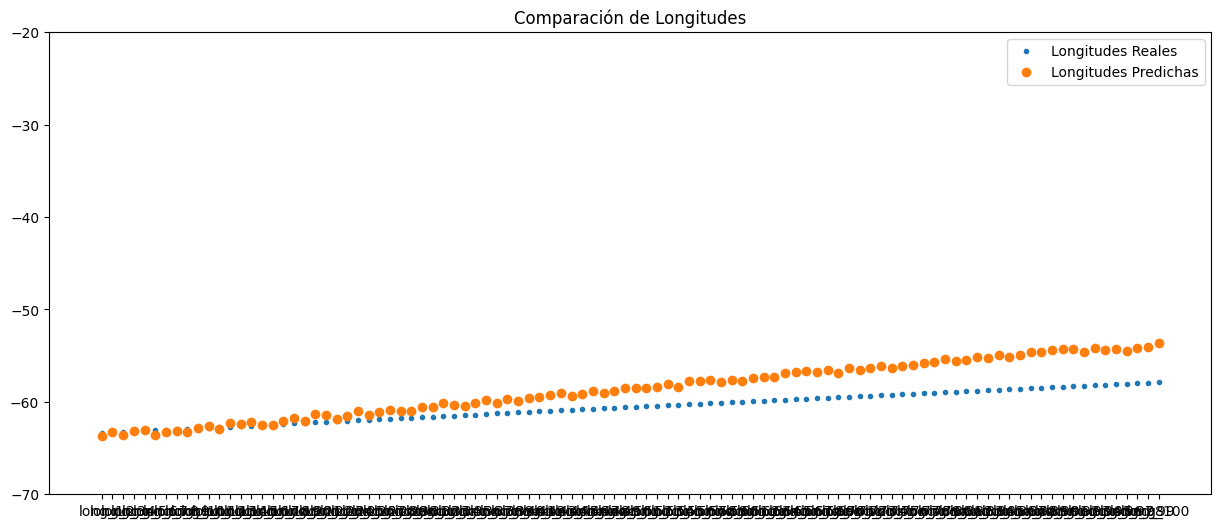

In [43]:
# Predecimos una muestra en particular de mi df
idx = 10


y_pred = autoencoder.predict(np.expand_dims(x_test.iloc[idx], axis = 0))

y_true =y_test.iloc[idx]
y_pred = y_pred[0,0:100]

# Grafica Longitudes 
plt.figure(figsize = (15,6))
plt.plot(y_true, label = 'Longitudes Reales',linestyle = 'None', marker = '.')
plt.plot(y_pred, label = 'Longitudes Predichas', linestyle = 'None', marker = 'o')
plt.ylim(-70,-20)
plt.title('Comparación de Longitudes')
plt.legend()
plt.show()